<b><div style="text-align: center;">Проект по А/B-тестированию</div></b><br>

<b><div style="text-align: center;">Постановка задачи</div></b><br>

Необходимо провести оценку результатов A/B-теста. В вашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.<br>
Оцените корректность проведения теста.<br>
Проанализируйте результаты теста.<br>
Чтобы оценить корректность проведения теста, проверьте:<br>
пересечение тестовой аудитории с конкурирующим тестом;<br>
совпадение теста и маркетинговых событий, другие проблемы временных границ теста.<br>

<b><div style="text-align: center;">Цель</div></b><br>
Необходимо проверить корректность проведения А/В теста<br>
Проанализировать результаты и решить, стоит ли принимать изменения, связанные с внедрением улучшенной рекомендательной системы<br>

<b><div style="text-align: center;">Техническое задание</div></b><br>

Название теста: recommender_system_test;<br>
Группы: А (контрольная), B (новая платёжная воронка);<br>
Дата запуска: 2020-12-07;<br>
Дата остановки набора новых пользователей: 2020-12-21;<br>
Дата остановки: 2021-01-04;<br>
Аудитория: 15% новых пользователей из региона EU;<br>
Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;<br>
Ожидаемое количество участников теста: 6000.<br>
Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:<br>
конверсии в просмотр карточек товаров — событие product_page<br>
просмотры корзины — product_cart<br>
покупки — purchase.<br>
Загрузите данные теста, проверьте корректность его проведения и проанализируйте полученные результаты.<br><br>
<b><div style="text-align: center;">Описание данных</div></b><br>
ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год;<br>
name — название маркетингового события;<br>
regions — регионы, в которых будет проводиться рекламная кампания;<br>
start_dt — дата начала кампании;<br>
finish_dt — дата завершения кампании.<br><br>
final_ab_new_users.csv — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;<br>
user_id — идентификатор пользователя;<br>
first_date — дата регистрации;<br>
region — регион пользователя;<br>
device — устройство, с которого происходила регистрация.<br><br>
final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;
Структура файла:<br>
user_id — идентификатор пользователя;<br>
event_dt — дата и время события;<br>
event_name — тип события;<br>
details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.<br><br>
final_ab_participants.csv — таблица участников тестов.<br>
user_id — идентификатор пользователя;<br>
ab_test — название теста;<br>
group — группа пользователя.<br>

<b><div style="text-align: center;">Декомпозиция </div></b><br>
1. Загрузка библиотек и чтение файлов данных<br>
2. Предобработка данных<br> 
  2.1 Исследовать общую информацию о данных.<br> 
  2.2 Исследовать пропущенные значения и при необходимости провести работу с пропусками в данных.Оценить, то какова их природа?<br> 
  2.3 Проверить корректность наименований колонок и переименовать колонки в случае необходимости.<br> 
  2.4 Исследовать требуется ли преобразование типов.<br> 
  2.5 Исследовать дубликаты и при наличии оценить, то какова их природа.<br> 
  2.6 Проверить соответствие данных условиям ТЗ<br> 
    2.6.1 Проверить время проведения теста.Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.<br> 
    2.6.2 Проверить аудиторию теста. Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.<br> 
    2.6.3 Проверить равномерность распределения пользователей по тестовым группам и правильность их формирования.<br> 
<br> 
3. Исследовательский анализ данных<br>
  3.1 Количество событий на пользователя одинаково распределены в выборках?<br>
  3.2 Как число событий в выборках распределено по дням?<br>
  3.3 Как меняется конверсия в воронке в выборках на разных этапах?<br>
  3.4 Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?<br>
4. Проведите оценку результатов A/B-тестирования:<br>
  4.1 Что можно сказать про результаты A/B-тестирования?<br>
  4.2 Проверьте статистическую разницу долей z-критерием<br>
5. Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста.<br>

## Загрузка библиотек и чтение файлов данных

In [417]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from datetime import datetime
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [418]:
promo = pd.read_csv('/datasets/ab_project_marketing_events.csv')    
users = pd.read_csv('/datasets/final_ab_new_users.csv')
ab_events = pd.read_csv('/datasets/final_ab_events.csv')
parts = pd.read_csv('/datasets/final_ab_participants.csv')


На этом шаге были загружены библиотеки, необходимые для работы и прочитаны файлы с данными для анализа. Далее выполним предобработку данных

## Предобработка данных

### Исследовать общую информацию о данных

In [419]:
datasets = [promo, users, ab_events, parts]
datasets_names=['promo','users' , 'ab_events', 'parts']  
for i in range (0,len(datasets)):
    print('Датасет: ',datasets_names[i])
    display(datasets[i].head())
    display(datasets[i].info())

Датасет:  promo


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

Датасет:  users


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

Датасет:  ab_events


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

Датасет:  parts


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

### Исследовать пропущенные значения и при необходимости провести работу с пропусками в данных.Оценить, то какова их природа?

* promo содержит 14 записей, пропусков нет <br>
* users содержит 61733 записей, пропусков нет<br>
* ab_events содержит 440317 записей, столбец details     62740  заполнено, 377577 пропусков<br>
* parts содержит 18268 записей, пропусков нет

Проанализируем при каких значениях пропуски:

In [420]:
ab_events.groupby('event_name').agg({'details':'count'})


,details
event_name,
login,0
product_cart,0
product_page,0
purchase,62740


Столбец purchase заполнен только если было событие покупка, в нем стоит сумма покупки, в остальных случаях он пустой. Данные пропуски соответствуют условиям, описынным в исходных данных, поэтому оставим их как есть.

### Проверить корректность наименований колонок и переименовать колонки в случае необходимости;

Во всех датасетах названия колонок корректные.

### Исследовать требуется ли преобразование типов.

Датасет promo, колонки start_dt и finish_dt имеют тип object, а содержат даты, исправим

In [421]:
promo['start_dt'] = promo['start_dt'].astype('datetime64')
promo['finish_dt'] = promo['finish_dt'].astype('datetime64')

Датасет users, колонка first_date тип object, а содержат даты, исправим

In [422]:
users['first_date'] = users['first_date'].astype('datetime64')

Датасет ab_events, колонка event_dt тип object, а содержат дату и время, исправим

In [423]:
ab_events['event_dt'] = ab_events['event_dt'].astype('datetime64')

### Исследовать дубликаты и при наличии оценить, то какова их природа.

#### Исследуем полные дубликаты

In [424]:
for i in range (0,len(datasets)):
    print('Число дубликатов в датасете: ',datasets_names[i],'=',datasets[i].duplicated().sum())

Число дубликатов в датасете:  promo = 0
Число дубликатов в датасете:  users = 0
Число дубликатов в датасете:  ab_events = 0
Число дубликатов в датасете:  parts = 0


Полных дубликатов нет

#### Исследуем неявные дубликаты

Проверим датасет users на совпадение user_id+region и user_id+device

In [427]:
users.duplicated(subset=['user_id', 'region']).sum()

0

In [428]:
users.duplicated(subset=['user_id', 'device']).sum()

0

Проверим датасет users на число значений device

In [430]:
users['device'].value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

В датасете 4 вида устройств, дубликатов с разным написанием нет

In [431]:
users['region'].value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

В датасете 4 региона, дубликатов с разным написанием нет

Неявных дубликатов не выявлено.

### Проверка данных на соответствие условиям ТЗ

#### Проверить время проведения теста. Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.

По условиям ТЗ:<br>
Дата запуска: 2020-12-07;<br>
Дата остановки набора новых пользователей: 2020-12-21;<br>
Дата остановки теста: 2021-01-04;<br>

##### Датасет promo

Проверим пересечение дат для акций региона EU

In [432]:
end='2020-12-07'
display(promo.query("regions.str.contains('EU') and finish_dt > @end"))


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Найдено пересечение дата остановки теста: 2021-01-04 с промо Christmas&New Year Promo, данные о покупах могут быть искажены.
Будем считать что данная промо не сильно повляет на результаты теста,т.к затронет обе группы пользоватлей. Более подробно изучим влияние промо на этапе анализа событий по дням.

##### Датасет users

По ТЗ новые пользователи набирались в период с 2020-12-07 по 2021-01-04<br>
Будем анализировать файл данных пользователей только в этом интервале

In [433]:
users_in=users.query('first_date >="2020-12-07" and first_date <="2020-12-21"')

In [434]:
print('период данных ',users_in['first_date'].min(), 'по', users_in['first_date'].max())

период данных  2020-12-07 00:00:00 по 2020-12-21 00:00:00


Данные в отфильтрованном датасете соотвествуют диапазону времени набора в ТЗ. Начало интервала совпадает с датой запуска: 2020-12-07; дата остановки набора новых пользователей: 2020-12-21.

In [435]:
print('В датасете осталось ', len(users_in), 'записей от начальных', len(users))

В датасете осталось  56470 записей от начальных 61733


##### Датасет ab_events

При анализе датасета проверим полноту данных, а также соответствие требованию ТЗ - события за 14 дней.

###### Анализ полноты данных в логах

In [436]:
print('период данных ',ab_events['event_dt'].min(), 'по', ab_events['event_dt'].max())

период данных  2020-12-07 00:00:33 по 2020-12-30 23:36:33


По условиям ТЗ 
Начало интервала совпадает с датой запуска: 2020-12-07,  а дата окончания теста 2021-01-04 больше чем данные в файле.
Предположительно в период праздников сбор данных не осуществлялся. Для теста имеет смысл рассмативать данные с 07-12 по 30-12.

Учитывая неполноту данных о событиях, выявилась еще одна проблема: мах дата регистрации пользователя 21-12, а период данных по 30-12. У части пользователей не будет выполнено условие ТЗ 14 дней с момента регистрации в системе. 

###### Анализ избыточности данных в логах

Будем делать проверку по lifetime. Для каждого пользователя определим мин дату события и будем вычислять lifetime строки как разницу мин и текущего времени.

In [437]:
events_min=ab_events.groupby('user_id').agg({'event_dt':'min'}) 
ab_events_lt=ab_events.merge(events_min, on='user_id')
ab_events_lt=ab_events_lt.rename(columns={'event_dt_x':'event_dt','event_dt_y':'min_dt' })
ab_events_lt['lifetime']=pd.to_datetime(ab_events_lt['event_dt'],unit='d') - pd.to_datetime(ab_events_lt['min_dt'],unit='d')
ab_events_in=ab_events_lt.query('lifetime<= "14 days 00:00:00"')
ab_events_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422640 entries, 0 to 440316
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   user_id     422640 non-null  object         
 1   event_dt    422640 non-null  datetime64[ns] 
 2   event_name  422640 non-null  object         
 3   details     60236 non-null   float64        
 4   min_dt      422640 non-null  datetime64[ns] 
 5   lifetime    422640 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(2), timedelta64[ns](1)
memory usage: 22.6+ MB


Размер датасета уменьшился, было 440317 записей, осталось 422640

#### Проверить аудиторию теста. Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.

In [438]:
display(parts.groupby('ab_test').agg({'user_id':'count'}))
print('В датасете ',parts['user_id'].nunique(),' уникальных пользователей')

,user_id
ab_test,
interface_eu_test,11567
recommender_system_test,6701


В датасете  16666  уникальных пользователей


Проверим пересечение групп пользователей

In [439]:
parts_1 = parts.query('ab_test == "recommender_system_test"')
parts_2 = parts.query('ab_test == "interface_eu_test"')
test= parts_1.merge(parts_2, on='user_id')
wrong_users = test['user_id'].unique().tolist()
print('Найдено ', len(wrong_users), 'пользователей, которые участвовали сразу в 2х тестах')

Найдено  1602 пользователей, которые участвовали сразу в 2х тестах


Проверим куда они входят

In [440]:
parts_wrong= parts.query('user_id in @wrong_users')
parts_wrong.query('ab_test=="recommender_system_test"').groupby('group').agg({'user_id':'count'})

,user_id
group,
A,921
B,681


Пользователи попали в обе группы теста interface_eu_test, очистим данные от аномальных пользователей

In [441]:
parts_good= parts.query('user_id not in @wrong_users')
parts_test=parts_good.query('ab_test=="recommender_system_test"')
print('В датасете осталось ', len(parts_good), 'записей от начальных', len(parts))
print('Число отфильтрованных участников теста recommender_system_test ',len(parts_test))

В датасете осталось  15064 записей от начальных 18268
Число отфильтрованных участников теста recommender_system_test  5099


In [442]:
display(parts_good.groupby('ab_test').agg({'user_id':'count'}))

,user_id
ab_test,
interface_eu_test,9965
recommender_system_test,5099


Найдено 1602 пользователей, которые участвовали сразу в 2х тестах. Наличие таких пользователей сильно искажает результаты теста, поэтому они были удалены.
По условиям ТЗ число участников теста recommender_system_test около 6000 человек, реально 5099 человек (этот показатель еще уменьшится в дальнейшем исследовании).

<b>Проверим также, не пересекаются ли у нас пользователи групп А и В в рамках одного теста</b>

In [443]:
parts_a = parts_good.query('group=="A"')
parts_b = parts_good.query('group=="B"')
test_t= parts_a.merge(parts_b, on='user_id')
wrong_users_test = test_t['user_id'].unique().tolist()
print('Найдено ', len(wrong_users_test), 'пользователей, которые участвовали сразу в 2х группах теста interface_eu_test')

Найдено  0 пользователей, которые участвовали сразу в 2х группах теста interface_eu_test


#### Проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

##### Регион : аудитория 15% новых пользователей из региона EU.

Для оценки пользователей региона объединим датасеты users, parts

In [444]:
in_test = parts.loc[parts['ab_test'] == 'recommender_system_test']
in_test = in_test.merge(users_in, on='user_id', how = 'inner')
test_u=in_test.groupby(['region']).agg({'user_id':'count'}).reset_index()
test_u.columns = ['region', 'test_users']
test_u

,region,test_users
0,APAC,72
1,CIS,55
2,EU,6351
3,N.America,223


Сделаем единую таблицу всех пользоватлей региона и расчитаем % пользоватлей теста.

In [445]:
all_users=users_in.groupby(['region']).agg({'user_id':'count'}).reset_index()
all_users.columns = ['region', 'all_users']
all_users=all_users.merge(test_u, on='region')
all_users['%']=round(all_users['test_users']/all_users['all_users']*100,0)
all_users.query('region=="EU"')

,region,all_users,test_users,%
2,EU,42340,6351,15.0


Сохраним число пользователей EU и после фильтрации еще раз проверим соотношение

In [446]:
all_eu=all_users.iloc [[2]]['all_users'].reset_index(drop=True)
print('Общее число пользователей EU=',all_eu[0])

Общее число пользователей EU= 42340


По первоначальной выборке условие ТЗ соблюдено, но далее, по мере фильтрации данных число тестовых пользователей снизится и уже не будет составлять 15%.

##### Наличие событий

Проверим все ли пользователи совершали события

In [447]:
df = parts_test.merge(ab_events_in, on = 'user_id', how='left')
print(df.isnull().sum())

user_id           0
group             0
ab_test           0
event_dt       2311
event_name     2311
details       18146
min_dt         2311
lifetime       2311
dtype: int64


После объединения видно, что часть пользователей не совершала событий, удалим их

In [448]:
df=df.dropna(subset=['event_name'])

##### Равномерность распределения пользователей

Соединим полученные данные с датасетом users

In [449]:
df=df.merge(users_in, on = 'user_id', how='left')

In [450]:
filtred=df.groupby('group')['user_id'].nunique()
a_b=round(filtred['B']/filtred['A']*100,2)
display(filtred)
print('Число пользователей в группе B составляет лишь',a_b,'% от пользователей A')

group
A    2082
B     706
Name: user_id, dtype: int64

Число пользователей в группе B составляет лишь 33.91 % от пользователей A


Число пользователей в группе А почти в 3 раза превышает пользователей группы В, но размер группы В превышает 10% пользоватлей группы А, что является достаточным для теста. 

In [451]:
all_u=filtred['A']+filtred['B']
u_tz=round(all_u/6000*100,2)
u_eu=round(all_u/all_eu[0]*100,2)
print('После фильтрации осталось',all_u,' что составляет' ,u_tz,'% от 6000 заявленных пользоватлей')
print('От всех пользователей региона EU',all_eu[0],' это составляет всего' ,u_eu,'%')


После фильтрации осталось 2788  что составляет 46.47 % от 6000 заявленных пользоватлей
От всех пользователей региона EU 42340  это составляет всего 6.58 %


   На этом этапе были <br>
- исследованы пропущенные значения<br>
- преобразованы типы данных object в datetime64<br>
- проверены дубликаты, их не обнаружено<br><br>
Была проведена проверка данных на соответствие условиям ТЗ<br>
- Найдено пересечение дата остановки теста: 2021-01-04 с промо Christmas&New Year Promo, влияние данной пром проверм далее<br>
- Датасет users были отфильтрованы пользователи с датой регистрации после окончания набора<br>
- Датасет ab_events - была выявлена неполнота данных,данные с 07-12 по 30-12<br>
- Датасет ab_events - была выявлена избыточность данных, лишние данные были удалены<br>
- В силу неполноты данных обнаружена проблема 14 дней с даты регстрации, часть пользователей не успеет набрать нужный срок в системе<br>
- Найдено  1602 пользователей, которые участвовали сразу в 2х тестах, они былы удалены, т.к. сильно исказили бы результаты<br>
- Были обнаружены пользователи без событий, они были удалены<br>
- В первоначальной выборке число пользоватлей соответствует ТЗ =15% от EU пользователей, но после фильтрации число сократилось <br>
- После фильтрации осталось 2788 пользователей, что составляет 46.47 % от 6000 заявленных пользоватлей и лишь 6.58 % от всех пользователей EU.<br>
Далее проведем исследовательский анализ данных.<br>

## Исследовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?

Расчитем количество событий на пользоватля

In [452]:
events_per_user = ab_events_in.groupby('user_id')['event_name'].count().reset_index()
events_per_user.columns = ['user_id', 'sum_events']

Добавим информацию в датасет df

In [453]:
df = df.merge(events_per_user, on='user_id', how='left')
gr_a= df.query('group =="A"')
gr_b= df.query('group =="B"')

Построим графики

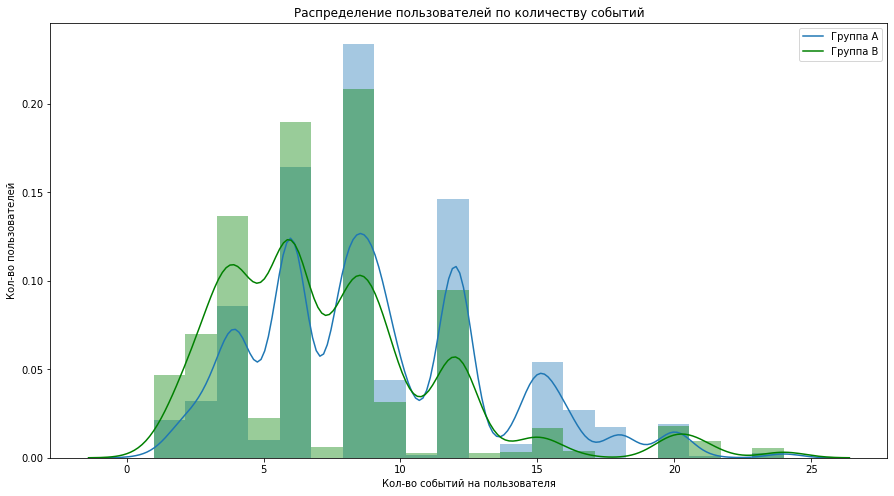

группа А среднее число событий 9
группа B среднее число событий 7


In [454]:
plt.figure(figsize=(15, 8))
sns.distplot(gr_a['sum_events'], bins=20)
sns.distplot(gr_b['sum_events'],bins=20, color = 'g')
plt.legend(labels = ('Группа A', 'Группа B'))
plt.xlabel('Кол-во событий на пользователя')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение пользователей по количеству событий')
plt.show()
print('группа А среднее число событий',round(gr_a['sum_events'].mean()))
print('группа B среднее число событий',round(gr_b['sum_events'].mean()))

Распределение событий по пользоватлея групп А и В похоже. В среднем по группе А на 1 событие больше чем в группе В.

### Как число событий в выборках распределено по дням?

In [455]:
df['day'] = df.event_dt.dt.date
gr_a= df.query('group =="A"')
gr_b= df.query('group =="B"')
gr_a = gr_a.groupby('day')['event_dt'].count().reset_index()
gr_b = gr_b.groupby('day')['event_dt'].count().reset_index()
gr_a.columns = ['day', 'sum_events']
gr_b.columns = ['day', 'sum_events']

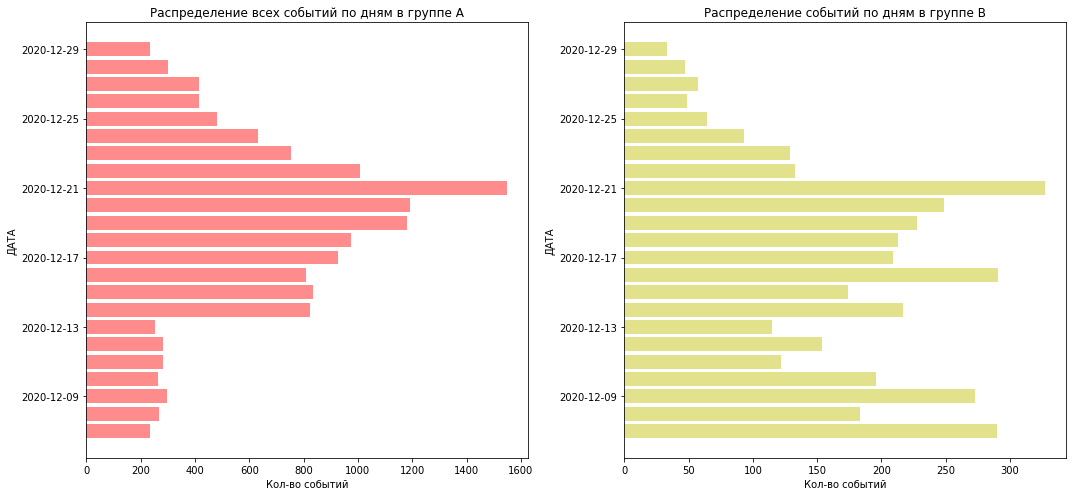

In [456]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax1 = plt.barh(gr_a['day'], gr_a['sum_events'], color='r', alpha=0.45)
plt.xlabel('Кол-во событий')
plt.ylabel('ДАТА')
plt.title('Распределение всех событий по дням в группе А')
ax2 = fig.add_subplot(122)
ax1 = plt.barh(gr_b['day'], gr_b['sum_events'], color='y', alpha=0.45)
plt.xlabel('Кол-во событий')
plt.ylabel('ДАТА')
plt.title('Распределение событий по дням в группе В')
plt.tight_layout()

Для группы А события примерно на одном уровне до 13 декабря, затем число событий возрастает и растет до мах 21-12, после этого начинает падать. В группе В также мах 21-12, затем снижение событий. До 21-12 график группы В показывает более высокую активность с 3 всплесками.

Рассмотрим также графики в разрезе событий

<Figure size 1656x720 with 0 Axes>

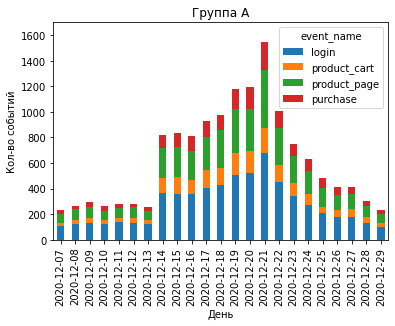

In [457]:
gr_a= df.query('group =="A"')
gr_b= df.query('group =="B"')
fig = plt.figure(figsize=(23,10))
ax = gr_a.pivot_table(index='day', values='user_id', columns='event_name', aggfunc='count').plot.bar(stacked=True, ylim=(0, 1700))
ax.set_title("Группа A")
plt.xlabel('День')
plt.ylabel('Кол-во событий')
plt.show()

Для группы А при росте событий с 14.12 по 21-12 заметен рост событий добавление в корзину, просмотр продукта и покупка. Данных за 30-12 у группы А нет.

<Figure size 1656x720 with 0 Axes>

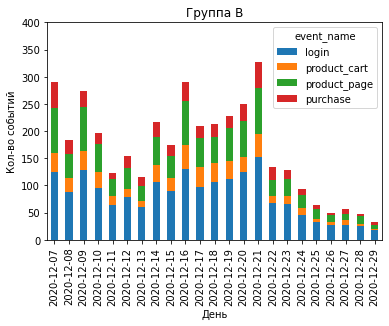

In [458]:
fig = plt.figure(figsize=(23,10))
ax = gr_b.pivot_table(index='day', values='user_id', columns='event_name', aggfunc='count').plot.bar(stacked=True, ylim=(0, 400))
ax.set_title("Группа B")
plt.xlabel('День')
plt.ylabel('Кол-во событий')
plt.show()

У группы В в период до 21.12 болшая активность по событиям добавление в корзину, просмотр продукта и покупка чем у группы А.
Также отметим, что 30-12 у группы В почти нет событий.

Уже на этом этапе можно заметить, что события добавление в корзину и покупка примерно равны. Подробнее их рассмсотрим далее на воронке событий.

Проверим рост событий 14 числа в группе А

In [460]:
question=df.query('group =="A"').groupby('day').agg({'user_id':'count','event_name' :'count', 'user_id': 'nunique'}).reset_index()
question=question.rename(columns={'user_id':'count_users', 'event_name':'sum_events'})
question['day']=question['day'].astype('datetime64')
question['per_user']=question['sum_events']/question['count_users']
question.head(10)

,day,count_users,sum_events,per_user
0,2020-12-07,109,234,2.146789
1,2020-12-08,121,267,2.206612
2,2020-12-09,135,296,2.192593
3,2020-12-10,122,265,2.172131
4,2020-12-11,137,282,2.058394
5,2020-12-12,134,282,2.104478
6,2020-12-13,126,253,2.007937
7,2020-12-14,366,823,2.248634
8,2020-12-15,361,834,2.310249
9,2020-12-16,356,810,2.275281


Можно заметить, что 14 числа резко (почти в 3 раза) выросло число пользоватлей, и сразу повысилось число событий, при этом число событий на пользователя резко не возросло.

### Как меняется конверсия в воронке в выборках на разных этапах?

Выделим пользоватлей тестов, для этого отфильтруем по группе и посчитаем число каждого события

In [461]:
events_count_A = gr_a.groupby('event_name').agg({'event_name':'count', 'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
step = pd.Series([0, 1, 3, 2], index=events_count_A.index)
events_count_A['step'] = step
events_count_A = events_count_A.sort_values(by='step')
events_count_A.columns = ['event_count', 'count_users', 'step']
events_count_A = events_count_A.reset_index()
events_count_A['percent'] = (100* events_count_A['count_users'] / gr_a['user_id'].nunique()).round(2)
events_count_B = gr_b.groupby('event_name').agg({'event_name':'count', 'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
step = pd.Series([0, 1, 3, 2], index=events_count_B.index)
events_count_B['step'] = step
events_count_B = events_count_B.sort_values(by='step')
events_count_B.columns = ['event_count', 'count_users', 'step']
events_count_B = events_count_B.reset_index()
events_count_B['percent'] = (100* events_count_B['count_users'] / gr_b['user_id'].nunique()).round(2)


Построим воронку

In [462]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name='Группа A',
    y = events_count_A['event_name'],
    x = events_count_A['count_users'],
    textposition = "inside",
    textinfo = "value+percent previous+ percent initial"
    ))
fig.add_trace(go.Funnel(
    name='Группа B',
    y = events_count_B['event_name'],
    x = events_count_B['count_users'],
    textposition = "auto",
    textinfo = "value+percent previous+ percent initial"
    )) 
fig.update_layout(title_text='Воронка событий по группам А,В')

fig.show()

<img src="https://raw.githubusercontent.com/Alex-tsyg/Yandex-Practicum/main/final/voronka.png" >

In [463]:
gr_a['user_id'].nunique()

2082

По воронке можно сказать, что: <br>
-практически по всем этапам конверсия группы А лучше группы В<br>
-есть преимущество группы А перед В по переходу в корзину со страницы товара 51% против 47%<br>
-подтвердилась закономерность, отмеченная на прошлых графиках, по группам А и В очень большой % перехода из корзины к покупке, для группы А =99%, для группы В=96%. 

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

Еще раз проверим всё ли соответствует ТЗ:

Название теста: recommender_system_test - отфильтровали <br>
Группы: А (контрольная), B (новая платёжная воронка) - проанализировали, размер групп корректный <br>
Дата запуска: 2020-12-07 - соответсвтеует данным<br>
Дата остановки набора новых пользователей: 2020-12-21- соответсвтеует данным<br>
Дата остановки: 2021-01-04 - данные представлены до 30-12-20, нет данных с 2021-01-01 по 2021-01-04. Учитывая, что на 30-12 по графику очень мало событий, фактически не хватает данных с 30-12 по 01-04<br>
Аудитория: 15% новых пользователей из региона EU- соответствует для начальных данных, после фильтрации оно ниже<br>
Ожидаемое количество участников теста: 6000 - не соответствует<br>
За 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики - не соответствует, не все пользоватли будут 14 дней в системе, учитывая неполноту исходных данных<br>

Также было обнаружено пересечение с промо. Промо программа Christmas&New Year Promo хоть и пересекается с датой окончания теста (с 2020-12-25 по 2021-01-03),она не оказала сильного вляния на группы, у группы А и В с 22.12 идет одинаковый спад активности.

На этом этапе были исследованы:<br>
- Распределение событий по пользоватлея групп А и В похоже. В среднем по группе А на 1 событие больше чем в группе В.<br>
- Как число событий в выборках распределено по дням? Для группы А события примерно на одном уровне до 13 декабря, затем число событий возрастает и растет до мах 21-12, после этого начинает падать. В группе В также мах 21-12, затем снижение событий. До 21-12 график группы В показывает более высокую активность с 3 всплесками.<br>
- Замечена неполнота данных, 30-12 у пользователей групп почти нет событий<br>
- Замечено равенство событий добавление в корзину и покупки, что говорит о высоком уровне конверсии от корзины к покпке.<br>
- Была построена воронка событий, которая показала, что практически по всем этапам конверсия группы А лучше группы В, есть преимущество группы А перед В по переходу в корзину со страницы товара 51% против 47%<br>
На следующем этапе проведем оценку результатов А/B тестирования.

## Проведите оценку результатов A/B-тестирования

### Что можно сказать про результаты A/B-тестирования?

По условиям ТЗ:
Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
конверсии в просмотр карточек товаров — событие product_page
просмотры корзины — product_cart
покупки — purchase.
Проверим реальную конверсию.

Сгруппируем датасет по группе и названию события, выберем уникальных пользоватлей.

In [464]:
test_u = df.groupby(['group', 'event_name'])['user_id'].nunique().reset_index()
test_u

,group,event_name,user_id
0,A,login,2082
1,A,product_cart,631
2,A,product_page,1360
3,A,purchase,652
4,B,login,705
5,B,product_cart,195
6,B,product_page,397
7,B,purchase,198


Расчитаем конверсию по 3м событиям

In [465]:
conversion = pd.DataFrame(index=['product_cart', 'product_page', 'purchase'],columns=['conv_A %','conv_B %','B/A %'])
conversion
for i in [1,2,3]:
    conversion.iloc[i-1, 0] = round((test_u.iloc[i,2] / test_u.iloc[0,2] * 100), 2)
    conversion.iloc[i-1, 1] = round((test_u.iloc[i+4,2] / test_u.iloc[4,2] * 100), 2)
conversion['B/A %'] = (conversion['conv_B %'] / conversion['conv_A %']-1) * 100
conversion

,conv_A %,conv_B %,B/A %
product_cart,30.31,27.66,-8.742989
product_page,65.32,56.31,-13.793631
purchase,31.32,28.09,-10.312899


По всем 3м событиям видим снижение конверсии, заявленного увеличения на 10% нет ни по 1 показателю.

### Проверьте статистическую разницу долей z-критерием

Для проверка гипотезы о равенстве долей выдвинем гипотезы:<br>
    H0: группы не имеют статистических различий.<br>
    H1: группы имеют статистические различия.<br>

In [466]:
users_by_events = df.pivot_table(index = 'group', columns = 'event_name', values = 'user_id',
                                   aggfunc = 'nunique').reset_index()
users_count = df.groupby('group')['user_id'].nunique()
users_by_events['count'] = users_by_events['group'].apply(lambda x: users_count.loc[x])
users_by_events = users_by_events.set_index('group')
users_by_events = users_by_events[['login', 'product_cart', 'product_page', 'purchase']].T
users_by_events

group,A,B
event_name,,
login,2082,705
product_cart,631,195
product_page,1360,397
purchase,652,198


In [467]:
final_test = df.drop_duplicates('user_id')
users_count_by_group = final_test.query('event_name == "purchase" or event_name == "product_cart" or event_name == "product_page" or event_name == "login"').groupby('group')['user_id'].nunique()
users_by_events = df.pivot_table(index='group', columns='event_name', values='user_id', aggfunc='nunique').reset_index()
users_by_events['user_count'] = users_by_events['group'].apply(lambda x: users_count_by_group.loc[x])
users_by_events = users_by_events.set_index('group')
users_by_events = users_by_events[['login', 'product_page',
                                   'product_cart', 'purchase', 'user_count']]
users_by_events

event_name,login,product_page,product_cart,purchase,user_count
group,,,,,
A,2082,1360,631,652,2082
B,705,397,195,198,706


In [468]:
def test(first, second, all_f, all_s, al):  
    """ Функция для проверки гипотез
    
    first- первая группа
    second-вторая группа
    all_f -всего в первой группе
    all_s- всего во второй группе
    al - уровень стат. значимости альфа
    """
    alpha = al  # критический уровень статистической значимости
    p1 = first / all_f 
    p2 = second / all_s 
    p_combined = (first + second) / (all_f + all_s) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_f + 1/all_s))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    al_r=round(al*100,2)
    if p_value < al:
        result='Отвергаем нулевую гипотезу: между долями есть значимая разница'
    else:
        result='Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    return print('Группы',gr_1,'и',gr_2,', конверсия в событие',curr_event, ', alpha=',al_r,'% p-value=',round(p_value,4), result)

Простейший из методов множественного сравнения — введение поправки Бонферрони. Которая гласит, что если мы хотим обеспечить вероятность ошибки α′, то в каждом из сравнений мы должны принять уровень значимости α′/k — это и есть поправка Бонферрони. В нашем случае трехкратное сравнении и уровень значимости должен быть 0,05/3= 1,7%. 

In [469]:
gr_1 = "A"
current_row = users_by_events.loc[gr_1]
gr_2 = "B"
for event_number in range(1,4):
    curr_event = users_by_events.columns[event_number]
    p_value_result = test(current_row[curr_event], 
                                   users_by_events[curr_event][gr_2],
                                   current_row['user_count'],
                                   users_by_events['user_count'][gr_2],
                                   0.017
                           )
  

Группы A и B , конверсия в событие product_page , alpha= 1.7 % p-value= 0.0 Отвергаем нулевую гипотезу: между долями есть значимая разница
Группы A и B , конверсия в событие product_cart , alpha= 1.7 % p-value= 0.1766 Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Группы A и B , конверсия в событие purchase , alpha= 1.7 % p-value= 0.1028 Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По конверсии в событие product_page (просмотр товара) между группами есть значимая разница.
По конверсии в события product_cart(корзина) и purchase(покупка) нет оснований считать доли разными. 

На этом этапе была проведена оценку результатов A/B-тестирования:<br>
 - По условиям ТЗ: Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%, но вместо этого видим снижение всех показателей <br>
 - Проверка статистической разницу долей z-критерием показала, что по конверсии в событие product_page (просмотр товара) между группами есть значимая разница. По конверсии в события product_cart(корзина) и purchase(покупка) нет оснований считать доли разными.<br>
На следующем этапе сформулирует финальные выводы и рекомендации.<br> 

## Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста.

<b>В целом тест можно считать успешным</b><br>
В результате анализа результатов теста было выявлено преимущество группы А по всем метрикам.<br>
Вместо заявленного роста показателей на 10%, произошло существенное уменьшение по всем (от 9 до 14%).<br>
Статистический тест при уровне статистической значимости альфа=0.05 показал: <br>
 -по конверсии в событие product_page (просмотр товара) между группами есть значимая разница; <br>
 -по конверсии в события product_cart(просмотр товара) и purchase(покупка) нет оснований считать доли разными.<br>
Тестирование изменений, связанных с внедрением улучшенной рекомендательной системы показывает преимущество старой системы перед новой, <b>новую рекомендательную систему лучше не внедрять</b>.<br>

<b>НО</b> <br>

При проведении теста <b>были выявлены ошибки</b>:<br>
- Период представленных данных не соответствует ТЗ, реально имеем полные данные лишь с 7-12 по 29-12 включитально<br>
- Есть пользователи, которые участвоавли сразу в 2х тестах<br>
- В период проведения теста проходила маркетинговая акция.<br>
- Ожидаемое количество участников оказалось менее заявленных в ТЗ 6000 участников.<br>
- Аудитория: 15% новых пользователей из региона EU подтвердилась лишь на исходных данных, для очищенных данных этот % меньше.<br>
- У части пользователей не выполнено условие ТЗ 14 дней с момента регистрации в системе.<br>
- В логах были данные о событиях давностью более 14 дней<br>

<b>Поэтому рекомендую:</b> <br>
Учитывая выявленные проблемы с данными, рекомендуется по возможности перезапустить тест и повторно выполнить анализ. 

